# ETS DATA MINING

Online Retail Dataset

In [2]:
import pandas as pd
import numpy as np
from apyori import apriori

In [3]:
retail=pd.read_csv("online_retail.csv")
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 08:26,3.39,17850.0,United Kingdom


In [4]:
a=np.sum(retail.isnull())
a=pd.DataFrame(a,columns=['a'])
b=pd.DataFrame([])
a=a.values
b['Variabel']=list(retail)
b['Jumlah Missing']=a
b

,Variabel,Jumlah Missing
0,InvoiceNo,0
1,StockCode,0
2,Description,1454
3,Quantity,0
4,InvoiceDate,0
5,UnitPrice,0
6,CustomerID,135080
7,Country,0


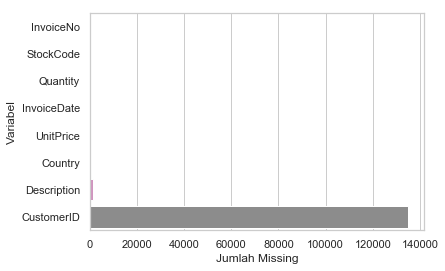

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
bb=b.sort_values('Jumlah Missing')
ax = sns.barplot(x="Jumlah Missing", y="Variabel", data=bb)
plt.show()

In [8]:
retail['Description'] = retail['Description'].str.strip()
retail.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
retail['InvoiceNo'] = retail['InvoiceNo'].astype('str') 
retail= retail[~retail['InvoiceNo'].str.contains('C')]
retail['Quantity'] = retail['Quantity'].astype('str')
retail = retail[~retail['Quantity'].str.contains('-')]
retail['UnitPrice'] = retail['UnitPrice'].astype('str')
retail = retail[~retail['UnitPrice'].str.contains('0')]
retail['UnitPrice'] = retail['UnitPrice'].astype('str')
retail = retail[~retail['UnitPrice'].str.contains('-')]

In [10]:
np.sum(retail.isnull())

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     107989
Country             0
dtype: int64

In [11]:
X = retail.groupby('InvoiceNo')
transaksi = []
for i, j  in X :
    transaksi.append(list(j['Description'].map(str)))

In [16]:
retail1 = pd.DataFrame(transaksi)
retail1.tail()

,0,1,2,3,4,5,6,7,8,9,...,913,914,915,916,917,918,919,920,921,922
19163,LUNCH BAG RED RETROSPOT,6 CHOCOLATE LOVE HEART T-LIGHTS,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
19164,6 CHOCOLATE LOVE HEART T-LIGHTS,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
19165,VICTORIAN GLASS HANGING T-LIGHT,EMBOSSED GLASS TEALIGHT HOLDER,ASSORTED COLOUR BIRD ORNAMENT,GREY HEART HOT WATER BOTTLE,LOVE HOT WATER BOTTLE,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE RED,ANTIQUE SILVER T-LIGHT GLASS,SET 6 SCHOOL MILK BOTTLES IN CRATE,FAIRY TALE COTTAGE NIGHT LIGHT,...,None,None,None,None,None,None,None,None,None,None
19166,LARGE CAKE STAND HANGING STRAWBERY,SET OF 3 HANGING OWLS OLLIE BEAK,RED RETROSPOT ROUND CAKE TINS,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
19167,CIRCUS PARADE LUNCH BOX,PLASTERS IN TIN CIRCUS PARADE,PLASTERS IN TIN STRONGMAN,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE IVORY,CHILDRENS APRON SPACEBOY DESIGN,SPACEBOY LUNCH BOX,CHILDRENS CUTLERY SPACEBOY,...,None,None,None,None,None,None,None,None,None,None


In [17]:
retail1.shape

(19168, 923)

In [19]:
records=[]
for i in range (0,19168): 
    records.append([str(retail1.values[i,j]) for j in range (0, 923)])

In [20]:
association_rules=apriori(records,min_support=0.008, 
                          min_confidence=0.7, 
                          min_lift=6, min_length=2) 

association_result=list(association_rules)

In [22]:
association_result[0]

RelationRecord(items=frozenset({'ASSORTED COLOUR BIRD ORNAMENT', 'PAINTED METAL PEARS ASSORTED'}), support=0.013512103505843072, ordered_statistics=[OrderedStatistic(items_base=frozenset({'PAINTED METAL PEARS ASSORTED'}), items_add=frozenset({'ASSORTED COLOUR BIRD ORNAMENT'}), confidence=0.7214484679665737, lift=9.504277824043495)])

In [21]:
for item in association_result:
    #first index of the inner list
    #contains base item and add item
    pair=item[0]
    items=[x for x in pair]
    print("rule: " + items[0]+ "->" +items[1])
    
    #second index of the inner list
    print("support:"+str(items[1]))
    
    #third index of the list located at 10th
    #of the third index of the inner list
    
    print ("confidence:"+str(item[2][0][2]))
    print("lift: "+str(item[2][0][3]))
    print("==================================")

rule: ASSORTED COLOUR BIRD ORNAMENT->PAINTED METAL PEARS ASSORTED
support:PAINTED METAL PEARS ASSORTED
confidence:0.7214484679665737
lift: 9.504277824043495
rule: BAKING SET 9 PIECE RETROSPOT->BAKING SET SPACEBOY DESIGN
support:BAKING SET SPACEBOY DESIGN
confidence:0.7309523809523809
lift: 16.216313932980597
rule: BLUE HAPPY BIRTHDAY BUNTING->PINK HAPPY BIRTHDAY BUNTING
support:PINK HAPPY BIRTHDAY BUNTING
confidence:0.7206703910614525
lift: 38.05457315665543
rule: WHITE HANGING HEART T-LIGHT HOLDER->CANDLEHOLDER PINK HANGING HEART
support:CANDLEHOLDER PINK HANGING HEART
confidence:0.7085427135678392
lift: 6.0201005025125625
rule: CHARLOTTE BAG SUKI DESIGN->CHARLOTTE BAG PINK POLKADOT
support:CHARLOTTE BAG PINK POLKADOT
confidence:0.7030075187969924
lift: 45.83417727993453
rule: RED RETROSPOT CHARLOTTE BAG->CHARLOTTE BAG PINK POLKADOT
support:CHARLOTTE BAG PINK POLKADOT
confidence:0.763157894736842
lift: 49.925633195617024
rule: CHARLOTTE BAG PINK POLKADOT->STRAWBERRY CHARLOTTE BAG
supp

rule: None->ROSES REGENCY TEACUP AND SAUCER
support:ROSES REGENCY TEACUP AND SAUCER
confidence:0.9069767441860465
lift: 16.32387815263675
rule: None->POPPY'S PLAYHOUSE KITCHEN
support:POPPY'S PLAYHOUSE KITCHEN
confidence:0.8994708994708993
lift: 39.72594055543364
rule: None->POPPY'S PLAYHOUSE BEDROOM
support:POPPY'S PLAYHOUSE BEDROOM
confidence:0.8835978835978835
lift: 51.794508357199476
rule: None->POPPY'S PLAYHOUSE KITCHEN
support:POPPY'S PLAYHOUSE KITCHEN
confidence:0.8697916666666666
lift: 50.98521916411824
rule: None->POPPY'S PLAYHOUSE BEDROOM
support:POPPY'S PLAYHOUSE BEDROOM
confidence:0.7170418006430868
lift: 42.031367690295674
rule: None->RED RETROSPOT CHARLOTTE BAG
support:RED RETROSPOT CHARLOTTE BAG
confidence:0.8789473684210526
lift: 56.15887719298245
rule: None->RED SPOT CERAMIC DRAWER KNOB
support:RED SPOT CERAMIC DRAWER KNOB
confidence:0.7155555555555555
lift: 34.461730876605245
rule: None->REGENCY TEAPOT ROSES
support:REGENCY TEAPOT ROSES
confidence:0.7942386831275721
l